# 读且显示图片，批量读取，归一化标注化预处理

In [1]:
import numpy as np
import torch
# 设置打印输出的格式选项
torch.set_printoptions(edgeitems=2, threshold=50)

In [6]:
# 读图片
import imageio.v2 as imageio
#imageio.imread 用于读取常规的 2D 图像数据，例如 JPEG、PNG 等格式的图像。它返回一个包含图像数据的 NumPy 数组。
img_arr = imageio.imread('../data/p1ch4/image-dog/bobby.jpg')
img_arr.shape

(720, 1280, 3)

In [14]:
img = torch.from_numpy(img_arr)
img.shape

torch.Size([720, 1280, 3])

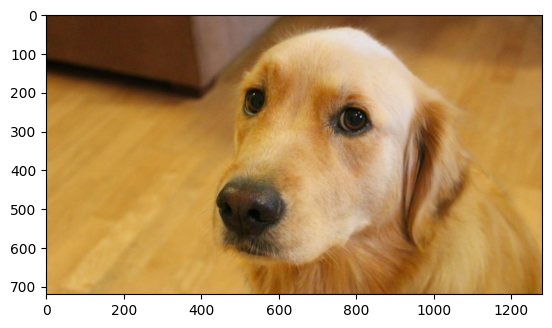

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(img)

In [15]:
# 进行图像处理中的通道转换操作,将img的维度顺序进行调整，将原本的第2维（通道维度）放到第0维位置，第0维放到第1维位置，第1维放到第2维位置。通过这个操作，可以将图像张量从形状为[height, width, channels]的格式转换为[channels, height, width]的格式。
out = img.permute(2, 0, 1)
out.shape

torch.Size([3, 720, 1280])

In [17]:
# batch是一个形状为(batch_size, 3, 256, 256)的4D张量，其中batch_size为3。每个样本（图像）具有3个通道（颜色通道），高度为256像素，宽度也为256像素。这个张量可以用来存储一个批次的图像数据
batch_size = 3
batch = torch.zeros(batch_size, 3, 256, 256, dtype=torch.uint8)
batch.shape

torch.Size([3, 3, 256, 256])

In [24]:
import os
data_dir = '../data/p1ch4/image-cats/'
name = os.listdir(data_dir)    #显示目录中文件
print(name)
for filename in name:
    x = os.path.splitext(filename)  #切分文件名
    print(x)
filenames = [name for name in os.listdir(data_dir)
             if os.path.splitext(name)[-1] == '.png']
filenames

['cat1.png', 'cat2.png', 'cat3.png']
('cat1', '.png')
('cat2', '.png')
('cat3', '.png')


['cat1.png', 'cat2.png', 'cat3.png']

In [25]:
import os

data_dir = '../data/p1ch4/image-cats/'
filenames = [name for name in os.listdir(data_dir)
             if os.path.splitext(name)[-1] == '.png']
# enumerate(filenames)用于在循环中同时获取索引和元素
for i, filename in enumerate(filenames):
    #os.path.join(data_dir, filename) 用于将目录路径 data_dir 和文件名 filename 拼接在一起，形成完整的文件路径。
    #imageio.imread() 函数用于读取图像文件并将其转换为一个 NumPy 数组对象
    img_arr = imageio.imread(os.path.join(data_dir, filename)) 
    #将 NumPy 数组转换为 PyTorch 张量 
    img_t = torch.from_numpy(img_arr)
    #转换为[channels, height, width]的格式。
    img_t = img_t.permute(2, 0, 1)
    img_t = img_t[:3]
    batch[i] = img_t
batch

tensor([[[[156., 152.,  ..., 149., 158.],
          [174., 134.,  ..., 136., 138.],
          ...,
          [129., 130.,  ..., 121., 114.],
          [129., 123.,  ..., 121., 120.]],

         [[139., 135.,  ..., 135., 147.],
          [160., 119.,  ..., 122., 124.],
          ...,
          [111., 111.,  ..., 112., 105.],
          [111., 104.,  ..., 110., 111.]],

         [[129., 123.,  ..., 132., 145.],
          [155., 110.,  ..., 119., 121.],
          ...,
          [108., 108.,  ..., 117., 110.],
          [107.,  98.,  ..., 115., 116.]]],


        [[[202., 193.,  ...,  13.,  12.],
          [199., 192.,  ...,  14.,  14.],
          ...,
          [ 75.,  68.,  ...,  36.,  37.],
          [ 85., 103.,  ...,  37.,  38.]],

         [[151., 139.,  ...,   9.,   8.],
          [151., 140.,  ...,  11.,  11.],
          ...,
          [ 33.,  26.,  ...,  26.,  27.],
          [ 40.,  58.,  ...,  27.,  28.]],

         [[ 68.,  53.,  ...,   6.,   5.],
          [ 67.,  54.,  ...,   

In [26]:
# 通过 batch.float() 将 batch 张量的数据类型转换为浮点型（float）。
# 然后，通过 batch /= 255.0 将 batch 张量中的所有元素除以255.0，以将像素值归一化到范围 [0, 1]。
batch = batch.float()
batch /= 255.0
batch.shape

torch.Size([3, 3, 256, 256])

In [27]:
# 使用 (batch[:, c] - mean) / std 将该通道上所有像素值减去平均值并除以标准差，完成标准化操作。
# 在进行标准化之前，需要先将所有像素值归一化到 [0, 1] 范围内
n_channels = batch.shape[1]
for c in range(n_channels):
    mean = torch.mean(batch[:, c])
    std = torch.std(batch[:, c])
    batch[:, c] = (batch[:, c] - mean) / std

print(mean)
print(std)
print(batch)

tensor(0.3554)
tensor(0.1931)
tensor([[[[ 0.1439,  0.0730,  ...,  0.0198,  0.1794],
          [ 0.4631, -0.2461,  ..., -0.2107, -0.1752],
          ...,
          [-0.3348, -0.3171,  ..., -0.4766, -0.6007],
          [-0.3348, -0.4412,  ..., -0.4766, -0.4944]],

         [[ 0.4632,  0.3874,  ...,  0.3874,  0.6150],
          [ 0.8615,  0.0839,  ...,  0.1408,  0.1787],
          ...,
          [-0.0678, -0.0678,  ..., -0.0489, -0.1816],
          [-0.0678, -0.2006,  ..., -0.0868, -0.0678]],

         [[ 0.7792,  0.6573,  ...,  0.8401,  1.1041],
          [ 1.3072,  0.3933,  ...,  0.5761,  0.6167],
          ...,
          [ 0.3526,  0.3526,  ...,  0.5354,  0.3933],
          [ 0.3323,  0.1495,  ...,  0.4948,  0.5151]]],


        [[[ 0.9595,  0.7999,  ..., -2.3915, -2.4092],
          [ 0.9063,  0.7822,  ..., -2.3738, -2.3738],
          ...,
          [-1.2922, -1.4163,  ..., -1.9837, -1.9660],
          [-1.1149, -0.7958,  ..., -1.9660, -1.9482]],

         [[ 0.6908,  0.4632,  ..., -